In [1]:
# Batuhan Cakir

# Importing Libraires
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os 
from tqdm import tqdm 
from PIL import Image

In [2]:
# Image Data train and test roads
train_x = "/Users/BATUHAN/Desktop/grey-Source/train_set/train_top"
train_y = "/Users/BATUHAN/Desktop/grey-Source/train_set/train_agac"

test_x  = "/Users/BATUHAN/Desktop/grey-Source/test_set/test_top"
test_y  = "/Users/BATUHAN/Desktop/grey-Source/test_set/test_agac"

image_size = (64,64) # Dataset image sizes

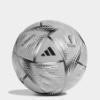

In [3]:
Image.open("/Users/BATUHAN/Desktop/grey-Source/train_set/train_top/images66.jpg")

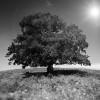

In [4]:
Image.open("/Users/BATUHAN/Desktop/grey-Source/train_set/train_agac/agac.jpg")

In [5]:
# Concatenate function for train and test data 
def data_split(data1, data2):
    data_x = [] 
    data_y =[]
    
    for image1 in tqdm(os.listdir(data1)): 
        path = os.path.join(data1, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size[0], image_size[1]))
        data_x.append(img1) 
        
    for image2 in tqdm(os.listdir(data2)):
        path = os.path.join(data2, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size[0], image_size[1]))
        data_y.append(img2) 
    
    t_data= np.concatenate((np.asarray(data_x),np.asarray(data_y)),axis=0)
    return t_data 

In [6]:
# Calling concatenate function, all data in the numpy matrix
train_data = data_split(train_x, train_y) 
test_data = data_split(test_x, test_y)

100%|██████████| 50/50 [00:00<00:00, 3887.57it/s]


In [7]:
x_data= np.concatenate((train_data, test_data),axis=0)

x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [8]:
z1 = np.zeros(450)
o1 = np.ones(450)
Y_train = np.concatenate((o1, z1), axis=0) # Creates (900,1) array for train

z = np.zeros(50)
o = np.ones(50)
Y_test = np.concatenate((o, z), axis=0)    # Creates (100,1) array for test

In [9]:
y_data = np.concatenate((Y_train, Y_test),axis=0).reshape(x_data.shape[0],1)

In [10]:
# Image-Binary Data shapes
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (1000, 64, 64)
Y shape:  (1000, 1)


In [11]:
# Splitting the data train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=42)

number_of_train = x_train.shape[0]
number_of_test  = x_test.shape[0]

In [12]:
# Image-Binary Data flatten shapes
x_train_flatten = x_train.reshape(number_of_train, x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test, x_test.shape[1]*x_test.shape[2])

print("X train flatten", x_train_flatten.shape)
print("X test flatten", x_test_flatten.shape)

X train flatten (900, 4096)
X test flatten (100, 4096)


In [13]:
x_train = x_train_flatten.T
x_test  = x_test_flatten.T
y_test  = y_test.T
y_train = y_train.T
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (4096, 900)
x test:  (4096, 100)
y train:  (1, 900)
y test:  (1, 100)


In [14]:
# Intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(16,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((16,1)),
                  "weight2": np.random.randn(y_train.shape[0],16) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

# Define sigmoid function
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    
    return y_head

In [15]:
# Computing cost value with function
def compute_cost_NN(A2, Y, parameters):
    
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    
    return cost

In [16]:
# Forward Propagation function NN
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [17]:
# Backward Propagation funciton NN
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    
    return grads

In [18]:
# Update parameters with function
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [19]:
# Prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [20]:
# 2 Layer neural network
# Every function is calling in this part, calculates train and test accuracy, it is plotting costs
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations, learning_rate = 0.01):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads, learning_rate)
        
        if i % 200 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.figure(figsize=(10,7))
    plt.plot(index_list,cost_list, color='green', linewidth=2)
    plt.xticks(index_list,rotation='vertical')
    plt.ylabel("Cost", fontsize=12, loc="top")
    plt.xlabel("Number of Iterarion", fontsize=12, loc="right")
    plt.grid(color='b', linestyle='--', linewidth=0.5)
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100, 3))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100, 3))
    
    return parameters

Cost after iteration 0: 0.295270
Cost after iteration 200: 0.305338
Cost after iteration 400: 0.273829
Cost after iteration 600: 0.237400
Cost after iteration 800: 0.208234
Cost after iteration 1000: 0.184872
Cost after iteration 1200: 0.165281
Cost after iteration 1400: 0.149367
Cost after iteration 1600: 0.135885
Cost after iteration 1800: 0.124282
Cost after iteration 2000: 0.114181
Cost after iteration 2200: 0.105259
Cost after iteration 2400: 0.097397
Cost after iteration 2600: 0.090503
Cost after iteration 2800: 0.084453
Cost after iteration 3000: 0.079076
Cost after iteration 3200: 0.074192
Cost after iteration 3400: 0.069652
Cost after iteration 3600: 0.065393
Cost after iteration 3800: 0.061539
Cost after iteration 4000: 0.058099


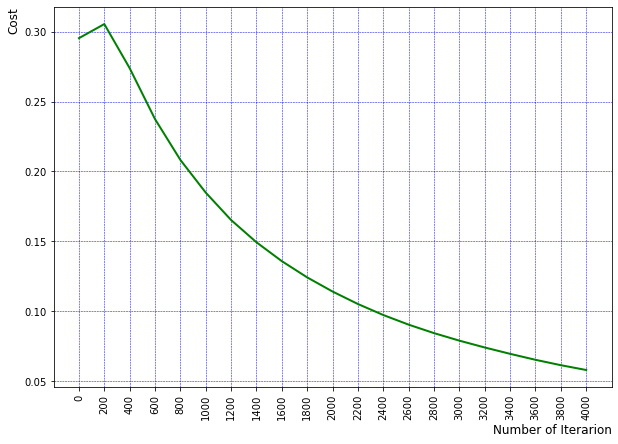

train accuracy: 97.11111111111111 %
test accuracy: 95.0 %


In [23]:
nn_values = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=4001, learning_rate=0.01)

In [24]:
nn_values

{'weight1': array([[ 0.11645256, -0.15597737,  0.00555095, ..., -0.10790175,
          0.01142557,  0.18361113],
        [-0.01625098,  0.03275214, -0.09179175, ...,  0.11023398,
         -0.09740951, -0.08120633],
        [-0.02370852, -0.0483956 ,  0.00671983, ..., -0.05170734,
         -0.07047568, -0.13181432],
        ...,
        [-0.00979765,  0.01929566, -0.03778732, ..., -0.11308347,
         -0.02122411,  0.00519218],
        [-0.01287857, -0.15000023, -0.12023439, ..., -0.01632282,
         -0.05868054,  0.04104751],
        [ 0.13273557, -0.03816514, -0.02252794, ..., -0.13515956,
          0.04747243,  0.20466864]]),
 'bias1': array([[ 0.00078048],
        [-0.0800873 ],
        [ 0.0265873 ],
        [ 0.07238577],
        [ 0.00306792],
        [-0.00046951],
        [ 0.00068101],
        [-0.10205447],
        [-0.12887708],
        [ 0.00448144],
        [-0.18677077],
        [-0.00401055],
        [ 0.00559519],
        [ 0.01495637],
        [ 0.00294747],
        